##  Credit-card fraud detection using resampling techniques with logistic regression

### Importing_libraries

In [1]:
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter

In [2]:
data=pd.read_csv("datasets/creditcard.csv")

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.shape

(284807, 31)

In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
#checking for null values
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
data["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

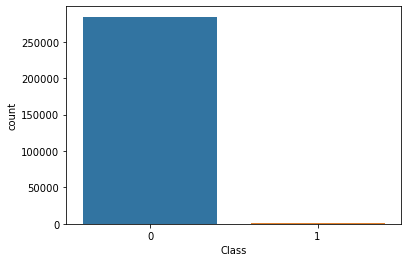

In [8]:
#plotting target variable
sns.countplot(data["Class"])

    This plot shows it is highly unbalanced as most of the features are non_fraud

<AxesSubplot:xlabel='Amount', ylabel='Density'>

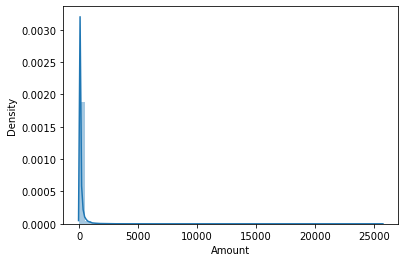

In [9]:
#it is highly right skewes data
sns.distplot(data['Amount'])

In [10]:
data['log_Amount'] = data['Amount'].apply(lambda x: np.log(x + 0.01))

In [11]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,log_Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,5.008166
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.993252
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,5.936665
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,4.816322
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,4.248495


## Correlation

<AxesSubplot:>

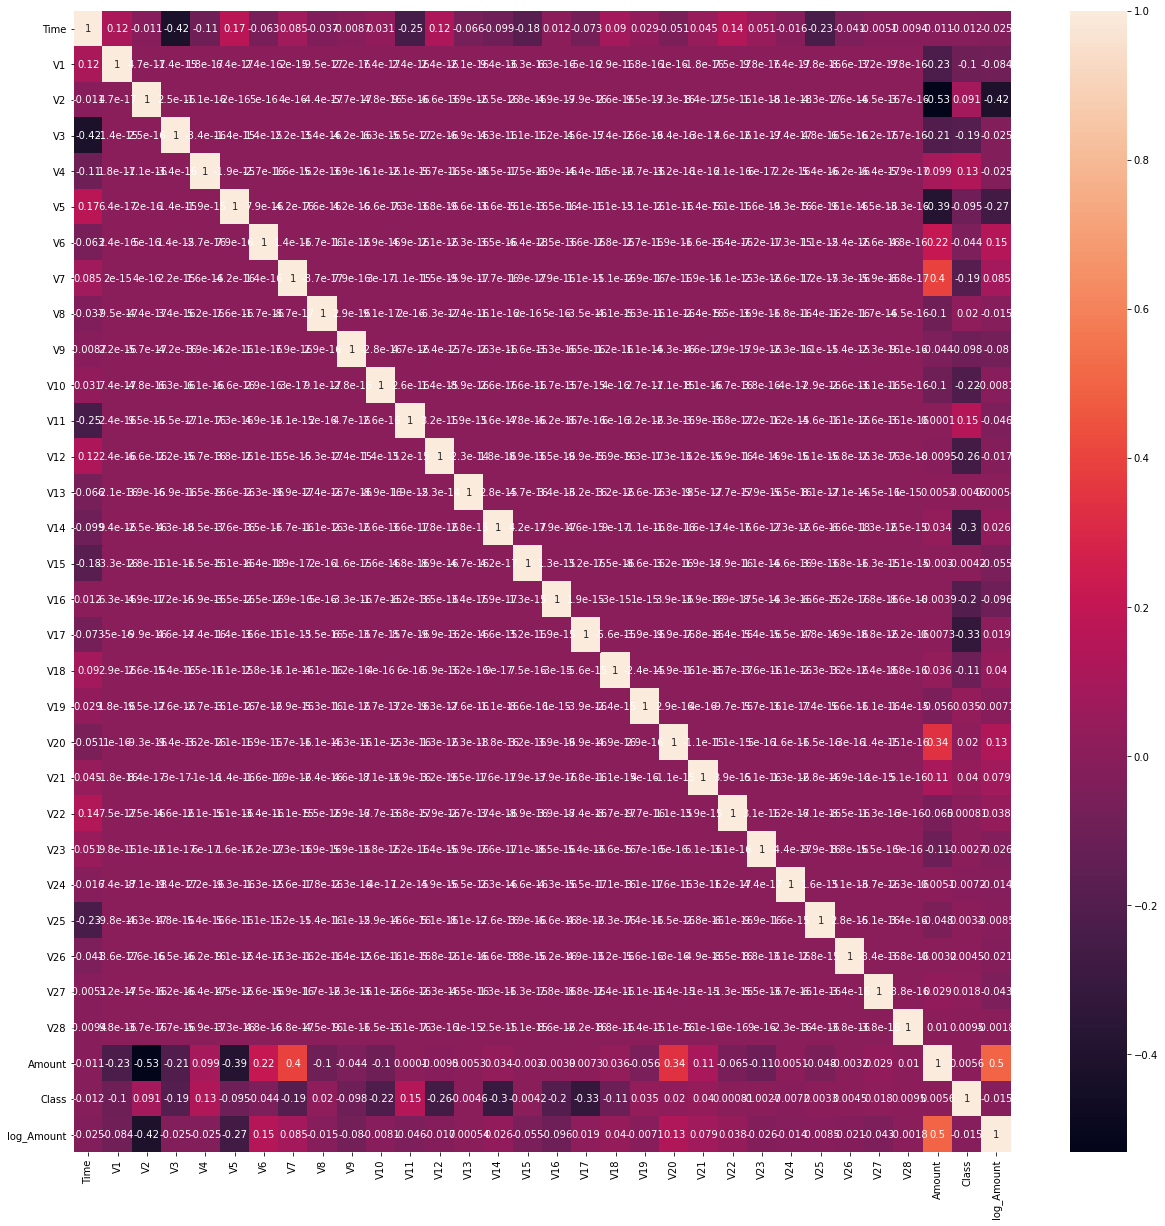

In [12]:
plt.figure(figsize=(21,21))
sns.heatmap(data.corr(),annot=True)

In [13]:
#droping amount column
df=data.drop("Amount",axis=1)

##  Handling an imbalaced dataset

In [14]:
#dividing the dataset
x=df.drop("Class",axis=1)
y=df['Class']

In [15]:
#preview of data
x.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,log_Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,5.008166
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.993252
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,5.936665
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,4.816322
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,4.248495


In [16]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [17]:
#splitting the dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

## 1.Random Over Sampler

In [18]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=50)
x_ros,y_ros=ros.fit_resample(x_train,y_train)
print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({0: 284315, 1: 492})
Resample dataset shape Counter({0: 227451, 1: 227451})


## 2.Random Under Sampler

In [19]:
from imblearn.under_sampling import RandomUnderSampler

ros = RandomUnderSampler(random_state=50)

# fit predictor and target variable
x_rus, y_rus = ros.fit_resample(x_train, y_train)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_rus))

Original dataset shape Counter({0: 284315, 1: 492})
Resample dataset shape Counter({0: 394, 1: 394})


## 3.Synthetic Minority Over-Sampling Technique(SMOTE)

In [20]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=50)
x_smote, y_smote =smote.fit_resample(x_train, y_train)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 284315, 1: 492})
Resample dataset shape Counter({0: 227451, 1: 227451})


## 4.Nearmiss

In [21]:
from imblearn.under_sampling import NearMiss

nm = RandomUnderSampler(random_state=50)

# fit predictor and target variable
x_nm, y_nm =nm.fit_resample(x_train, y_train)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_nm))

Original dataset shape Counter({0: 284315, 1: 492})
Resample dataset shape Counter({0: 394, 1: 394})


## Logistic regression with Random Over Sampler

In [22]:
model_1=LogisticRegression()
model_1.fit(x_ros,y_ros)
pred_1=model_1.predict(x_test)
acc_1 = accuracy_score(y_test, pred_1)
con_mat = confusion_matrix(y_test, pred_1)
clf_report = classification_report(y_test, pred_1)
print(f"Accuracy Score of Logistic Regression : {acc_1}")
print(f"Confusion Matrix : \n{con_mat}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Logistic Regression : 0.9662406516625118
Confusion Matrix : 
[[54952  1912]
 [   11    87]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56864
           1       0.04      0.89      0.08        98

    accuracy                           0.97     56962
   macro avg       0.52      0.93      0.53     56962
weighted avg       1.00      0.97      0.98     56962



## Logistic Regression with Random Under Sampler

In [26]:
model_2=LogisticRegression()
model_2.fit(x_rus,y_rus)
pred_1=model_1.predict(x_test)
acc_2 = accuracy_score(y_test, pred_1)
con_mat = confusion_matrix(y_test, pred_1)
clf_report = classification_report(y_test, pred_1)
print(f"Accuracy Score of Logistic Regression : {acc_2}")
print(f"Confusion Matrix : \n{con_mat}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Logistic Regression : 0.9662406516625118
Confusion Matrix : 
[[54952  1912]
 [   11    87]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56864
           1       0.04      0.89      0.08        98

    accuracy                           0.97     56962
   macro avg       0.52      0.93      0.53     56962
weighted avg       1.00      0.97      0.98     56962



## Logistic Regression with SMOTE

In [27]:
model_3=LogisticRegression()
model_3.fit(x_smote,y_smote)
pred_1=model_1.predict(x_test)
acc_3 = accuracy_score(y_test, pred_1)
con_mat = confusion_matrix(y_test, pred_1)
clf_report = classification_report(y_test, pred_1)
print(f"Accuracy Score of Logistic Regression : {acc_3}")
print(f"Confusion Matrix : \n{con_mat}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Logistic Regression : 0.9662406516625118
Confusion Matrix : 
[[54952  1912]
 [   11    87]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56864
           1       0.04      0.89      0.08        98

    accuracy                           0.97     56962
   macro avg       0.52      0.93      0.53     56962
weighted avg       1.00      0.97      0.98     56962



## Logistic Regression with NearMiss

In [28]:
model_4=LogisticRegression()
model_4.fit(x_nm,y_nm)
pred_2=model_2.predict(x_test)
acc_4 = accuracy_score(y_test, pred_2)
con_mat = confusion_matrix(y_test, pred_2)
clf_report = classification_report(y_test, pred_2)
print(f"Accuracy Score of Logistic Regression : {acc_4}")
print(f"Confusion Matrix : \n{con_mat}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Logistic Regression : 0.9640286506794004
Confusion Matrix : 
[[54826  2038]
 [   11    87]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.89      0.08        98

    accuracy                           0.96     56962
   macro avg       0.52      0.93      0.53     56962
weighted avg       1.00      0.96      0.98     56962



In [31]:
d = {'Technique': ["Logistic Random under sampling","Logistic Random over sampling","Logistic SMOTE","Logistic Near miss"],
     'Score': [acc_1,acc_2,acc_3,acc_4]}
final_df = pd.DataFrame(data=d)

# Move column
score = final_df['Score']
final_df.sort_values(by="Score",ascending=False)

,Technique,Score
0,Logistic Random under sampling,0.966241
1,Logistic Random over sampling,0.966241
2,Logistic SMOTE,0.966241
3,Logistic Near miss,0.964029
